# Bar plots creations

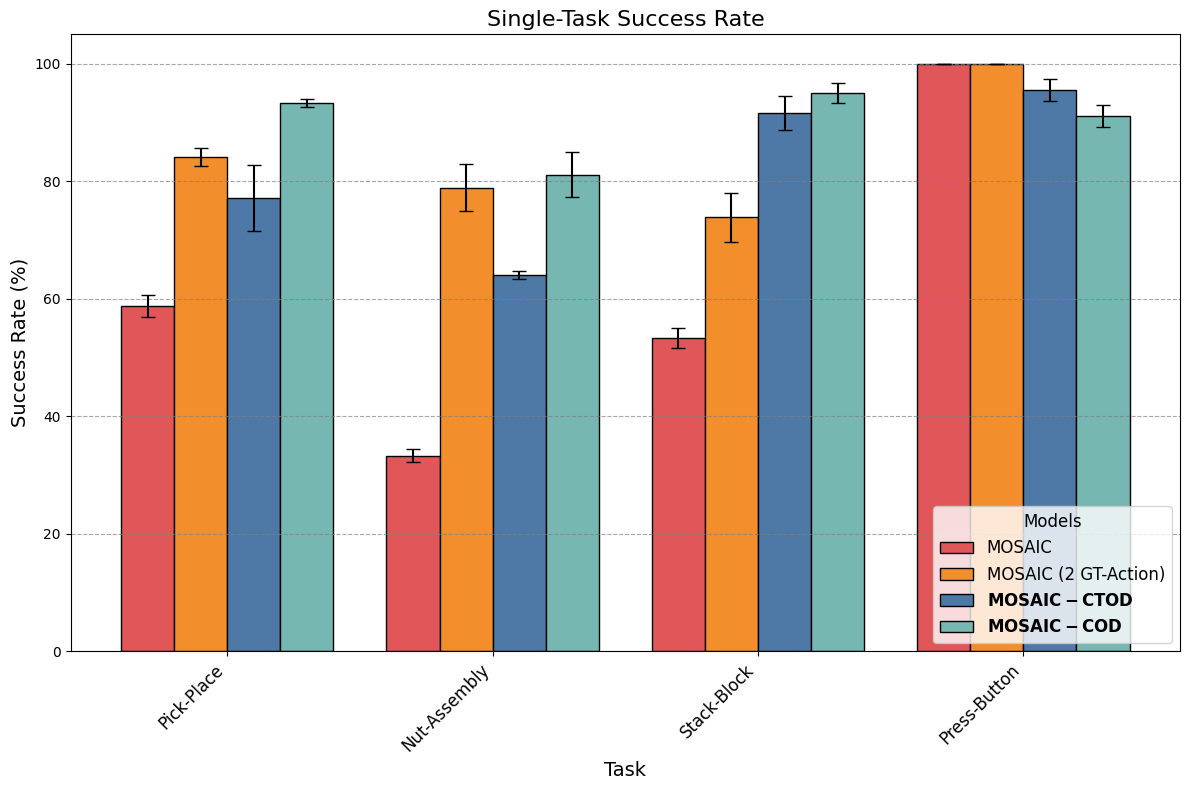

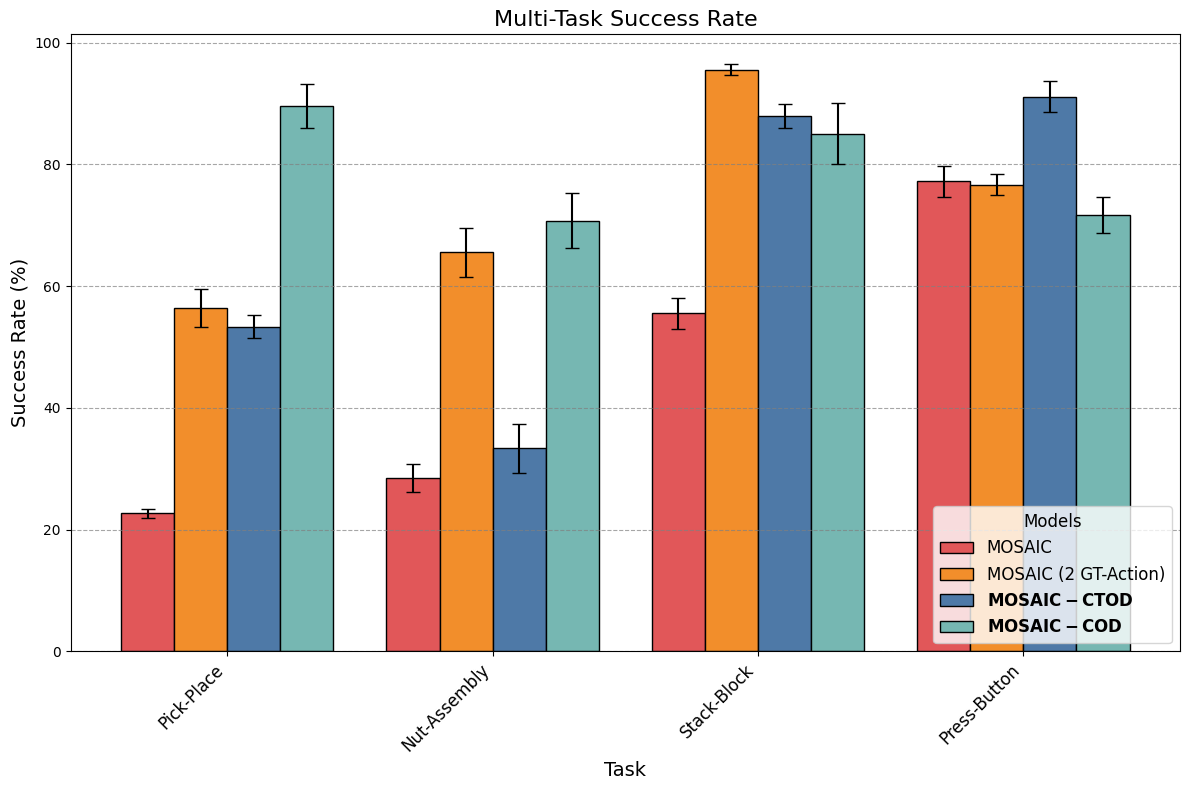

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data extracted from the LaTeX table
data = {
    "Task": ["Pick-Place", "Nut-Assembly", "Stack-Block", "Press-Button"],
    "Models": ["MOSAIC", "MOSAIC (2 GT-Action)", "MOSAIC-CTOD", "MOSAIC-COD"],
    "Single_Task_Mean": [
        [58.75, 84.17, 77.11, 93.33],
        [33.33, 78.89, 64.07, 81.11],
        [53.33, 73.89, 91.67, 95.00],
        [100.00, 100.00, 95.56, 91.11]
    ],
    "Single_Task_Std": [
        [1.87, 1.57, 5.60, 0.72],
        [1.11, 4.01, 0.64, 3.84],
        [1.66, 4.19, 2.88, 1.66],
        [0.00, 0.00, 1.92, 1.92]
    ],
    "Multi_Task_Mean": [
        [22.71, 56.46, 53.33, 89.58],
        [28.53, 65.56, 33.33, 70.74],
        [55.56, 95.56, 87.92, 85.00],
        [77.22, 76.67, 91.11, 71.67]
    ],
    "Multi_Task_Std": [
        [0.72, 3.14, 1.90, 3.55],
        [2.31, 4.00, 4.00, 4.49],
        [2.54, 0.96, 2.00, 5.00],
        [2.54, 1.67, 2.54, 2.88]
    ]
}

# Configuration
tasks = data["Task"]
models = data["Models"]
num_tasks = len(tasks)
num_models = len(models)

# Colors for different models
colors = ["#e15759", "#f28e2b", "#4e79a7","#76b7b2"] 

# Define bold labels for MOSAIC-CTOD and MOSAIC-COD
legend_labels = [
    "MOSAIC",
    "MOSAIC (2 GT-Action)",
    r"$\bf{MOSAIC-CTOD}$",
    r"$\bf{MOSAIC-COD}$"
]

# Function to create grouped bar plots
def plot_grouped_bar(task_type, means, stds, title, filename):
    """
    Plots a grouped bar chart and saves it to a file.

    Parameters:
    - task_type: str, "Single-Task" or "Multi-Task"
    - means: list of lists, mean success rates
    - stds: list of lists, standard deviations
    - title: str, title of the plot
    - filename: str, filename to save the plot
    """
    x = np.arange(num_tasks)  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))

    # Offset for each model's bar
    offsets = np.linspace(-width * (num_models-1)/2, width * (num_models-1)/2, num_models)

    for i, (model, color, label) in enumerate(zip(models, colors, legend_labels)):
        # Extract means and stds for the current model across all tasks
        model_means = [means[task_idx][i] for task_idx in range(num_tasks)]
        model_stds = [stds[task_idx][i] for task_idx in range(num_tasks)]
        
        bars = ax.bar(x + offsets[i], model_means, width, label=label, color=color, 
               yerr=model_stds, capsize=5, edgecolor='black')

        # Add error values on top of the bars
        # for bar, mean, std in zip(bars, model_means, model_stds):
        #     height = bar.get_height()
        #     ax.annotate(f'{mean:.2f}\n±{std:.2f}',
        #                 xy=(bar.get_x() + bar.get_width() / 2, height),
        #                 xytext=(0, 10),  # 3 points vertical offset
        #                 textcoords="offset points",
        #                 ha='center', va='bottom')

    # Labels and title
    ax.set_xlabel('Task', fontsize=14)
    ax.set_ylabel('Success Rate (%)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(tasks, rotation=45, ha="right", fontsize=12)
    
    # Legend positioned at the bottom-right
    ax.legend(title="Models", fontsize=12, title_fontsize=12, loc='lower right')
    
    # Add gridlines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, format="png", dpi=300)
    plt.show()
# Plot for Single-Task and save as 'single_task_success_rates.png'
plot_grouped_bar(
    task_type="Single-Task",
    means=data["Single_Task_Mean"],
    stds=data["Single_Task_Std"],
    title="Single-Task Success Rate",
    filename="single_task_success_rates.png"
)

# Plot for Multi-Task and save as 'multi_task_success_rates.png'
plot_grouped_bar(
    task_type="Multi-Task",
    means=data["Multi_Task_Mean"],
    stds=data["Multi_Task_Std"],
    title="Multi-Task Success Rate",
    filename="multi_task_success_rates.png"
)

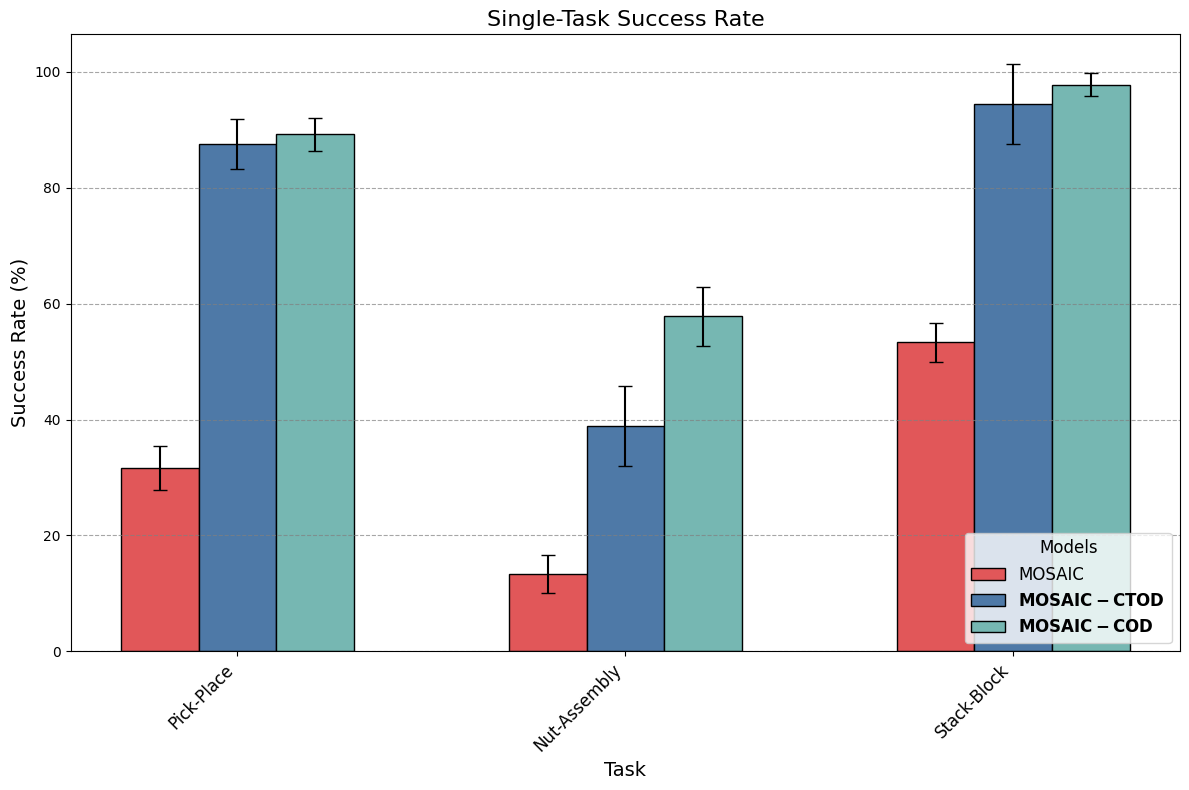

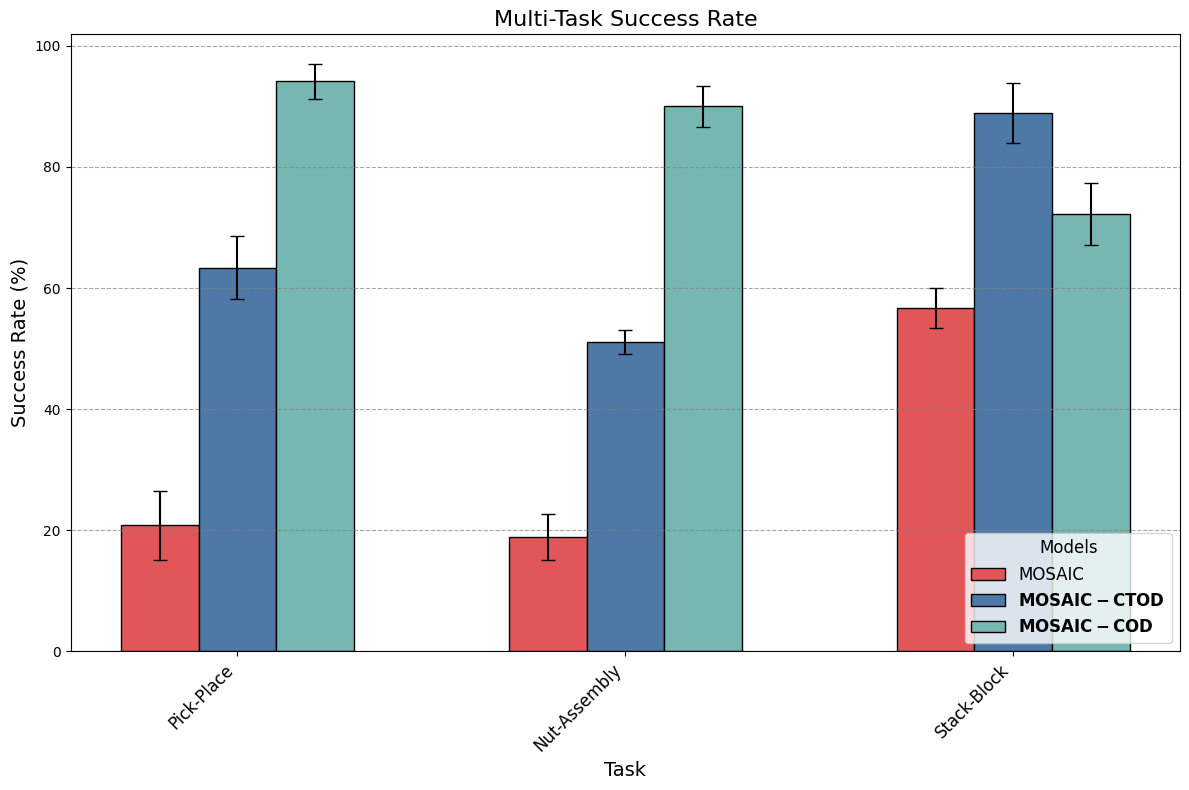

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data extracted from the LaTeX table
data = {
    "Task": ["Pick-Place", "Nut-Assembly", "Stack-Block"],
    "Models": ["MOSAIC", "MOSAIC-CTOD", "MOSAIC-COD"],
    "Single_Task_Mean": [
        [31.67, 87.50, 89.17],
        [13.33, 38.89, 57.78],
        [53.33, 94.44, 97.78]
    ],
    "Single_Task_Std": [
        [3.82, 4.30, 2.89],
        [3.33, 6.94, 5.09],
        [3.33, 6.94, 1.93]
    ],
    "Multi_Task_Mean": [
        [20.83, 63.33, 94.17],
        [18.88, 51.11, 90.00],
        [56.66, 88.88, 72.20]
    ],
    "Multi_Task_Std": [
        [5.70, 5.20, 2.88],
        [3.84, 1.92, 3.33],
        [3.33, 5.00, 5.09]
    ]
}


# Configuration
tasks = data["Task"]
models = data["Models"]
num_tasks = len(tasks)
num_models = len(models)

# Colors for different models
colors = ["#e15759", "#4e79a7","#76b7b2"] #["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]

# Define bold labels for MOSAIC-CTOD and MOSAIC-COD
legend_labels = [
    "MOSAIC",
    r"$\bf{MOSAIC-CTOD}$",
    r"$\bf{MOSAIC-COD}$"
]

# Function to create grouped bar plots
def plot_grouped_bar(task_type, means, stds, title, filename):
    """
    Plots a grouped bar chart and saves it to a file.

    Parameters:
    - task_type: str, "Single-Task" or "Multi-Task"
    - means: list of lists, mean success rates
    - stds: list of lists, standard deviations
    - title: str, title of the plot
    - filename: str, filename to save the plot
    """
    x = np.arange(num_tasks)  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))

    # Offset for each model's bar
    offsets = np.linspace(-width * (num_models-1)/2, width * (num_models-1)/2, num_models)

    for i, (model, color, label) in enumerate(zip(models, colors, legend_labels)):
        # Extract means and stds for the current model across all tasks
        model_means = [means[task_idx][i] for task_idx in range(num_tasks)]
        model_stds = [stds[task_idx][i] for task_idx in range(num_tasks)]
        
        ax.bar(x + offsets[i], model_means, width, label=label, color=color, 
               yerr=model_stds, capsize=5, edgecolor='black')

    # Labels and title
    ax.set_xlabel('Task', fontsize=14)
    ax.set_ylabel('Success Rate (%)', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(tasks, rotation=45, ha="right", fontsize=12)
    
    # Legend positioned at the bottom-right
    ax.legend(title="Models", fontsize=12, title_fontsize=12, loc='lower right')
    
    # Add gridlines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)

    # Save the figure to a file
    plt.tight_layout()
    plt.savefig(filename, format="png", dpi=300)
    plt.show()
# Plot for Single-Task and save as 'single_task_success_rates.png'
plot_grouped_bar(
    task_type="Single-Task",
    means=data["Single_Task_Mean"],
    stds=data["Single_Task_Std"],
    title="Single-Task Success Rate",
    filename="single_task_success_rates_generalization.png"
)

# Plot for Multi-Task and save as 'multi_task_success_rates.png'
plot_grouped_bar(
    task_type="Multi-Task",
    means=data["Multi_Task_Mean"],
    stds=data["Multi_Task_Std"],
    title="Multi-Task Success Rate",
    filename="multi_task_success_rates_generalization.png"
)